## Term Deposit Sale
### Goal
Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio.
Resources Available
The historical data for this project is available in file

### Import all necessary libraries and load data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

%matplotlib inline 

import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
        
import pandas_profiling

from scipy import stats

# For breaking the X and y dataframes into training set and test set.
from sklearn.model_selection import train_test_split

# For Logistic Regression Modelling
from sklearn.linear_model import LogisticRegression 

# For Decision Tree Modelling
from sklearn.tree import DecisionTreeClassifier

# calculate accuracy measures and confusion matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score, confusion_matrix
from yellowbrick.classifier import ClassificationReport, ROCAUC

# plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
df = pd.read_csv('bank-full.csv')

## Deliverable – 1 Exploratory Data Quality Report – (20)

### General Description of the DataFrame

In [4]:
df.head() #View the first 5 rows of the dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Get information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We have 7 numerical columns and 10 non-numerical columns. All 45211 rows have an entry. Hence there are no null values.

In [6]:
# confirm the number of rows and columns in the dataframe
df.shape

(45211, 17)

## Univariate Analysis (12 marks)

In [7]:
#Descriptive Statistics of dataframe using the describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


The above shows the Descriptive Statistics of the 7 numerical columns in the dataframe

In [8]:
# checking value counts of all object type columns
for i in list(df.columns[df.dtypes=='object']):   
    print(df[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

The above shows the Description of the 10 non-numerical variables. 

In [9]:
# Include non-numerical data in Descriptive Statistics of dataframe
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,"45,211.00",NaN,NaN,NaN,40.94,10.62,18.00,33.00,39.00,48.00,95.00
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,"45,211.00",NaN,NaN,NaN,"1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,"45,211.00",NaN,NaN,NaN,15.81,8.32,1.00,8.00,16.00,21.00,31.00


### Numerical Attribute Distributions

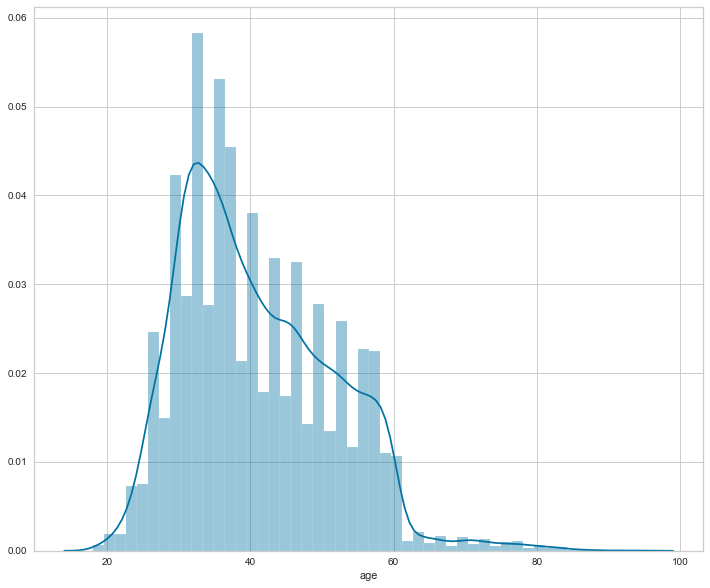

In [10]:
# Distribution of the Age column in dataframe
plt.figure(figsize=(12,10))
sns.distplot(df['age'])
    

In [11]:
df['age'].value_counts(normalize = True)

32   0.05
31   0.04
33   0.04
34   0.04
35   0.04
     ... 
90   0.00
92   0.00
93   0.00
95   0.00
94   0.00
Name: age, Length: 77, dtype: float64

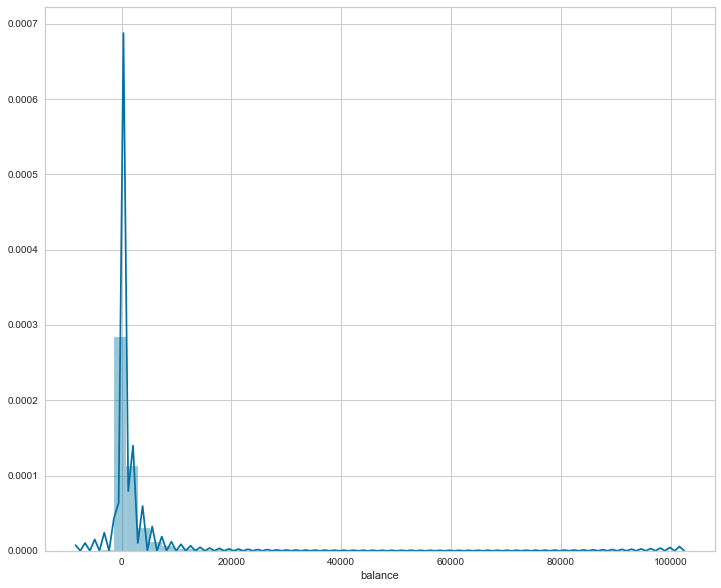

In [12]:
# Distribution of the Balance column in dataframe
plt.figure(figsize=(12,10))
sns.distplot(df['balance'])

In [13]:
df['balance'].value_counts(normalize = True)

0       0.08
1       0.00
2       0.00
4       0.00
3       0.00
        ... 
4305    0.00
6352    0.00
18881   0.00
14889   0.00
7218    0.00
Name: balance, Length: 7168, dtype: float64

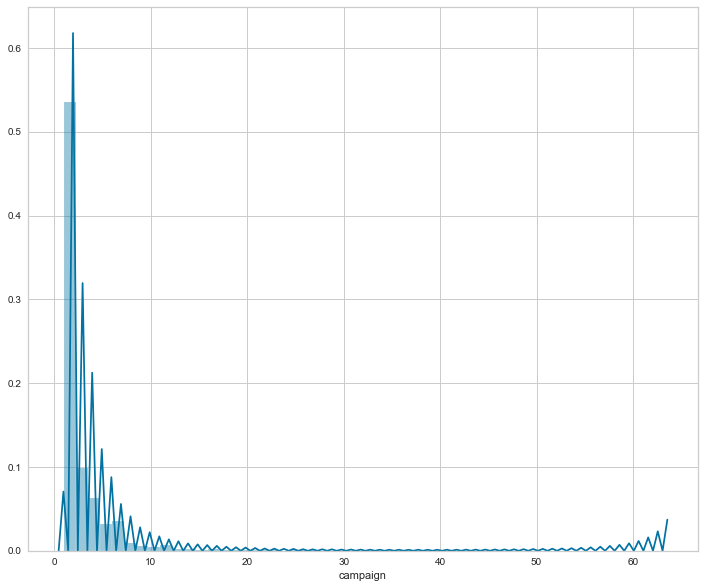

In [14]:
# Distribution of the Campaign column in dataframe
plt.figure(figsize=(12,10))
sns.distplot(df['campaign'])

In [15]:
df['campaign'].value_counts(normalize = True)

1    0.39
2    0.28
3    0.12
4    0.08
5    0.04
6    0.03
7    0.02
8    0.01
9    0.01
10   0.01
11   0.00
12   0.00
13   0.00
14   0.00
15   0.00
16   0.00
17   0.00
18   0.00
19   0.00
20   0.00
21   0.00
22   0.00
23   0.00
25   0.00
24   0.00
28   0.00
29   0.00
26   0.00
31   0.00
27   0.00
32   0.00
30   0.00
33   0.00
34   0.00
36   0.00
35   0.00
43   0.00
38   0.00
41   0.00
50   0.00
37   0.00
51   0.00
55   0.00
46   0.00
58   0.00
44   0.00
39   0.00
63   0.00
Name: campaign, dtype: float64

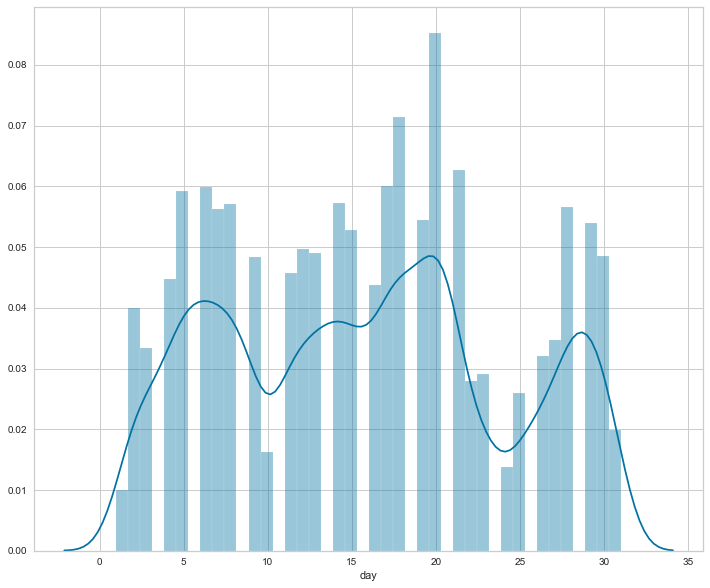

In [16]:
# Distribution of the Day column in dataframe
plt.figure(figsize=(12,10))
sns.distplot(df['day'])

In [17]:
df['day'].value_counts(normalize = True)

20   0.06
18   0.05
21   0.04
17   0.04
6    0.04
5    0.04
14   0.04
8    0.04
28   0.04
7    0.04
19   0.04
29   0.04
15   0.04
12   0.04
13   0.04
30   0.03
9    0.03
11   0.03
4    0.03
16   0.03
2    0.03
27   0.02
3    0.02
26   0.02
23   0.02
22   0.02
25   0.02
31   0.01
10   0.01
24   0.01
1    0.01
Name: day, dtype: float64

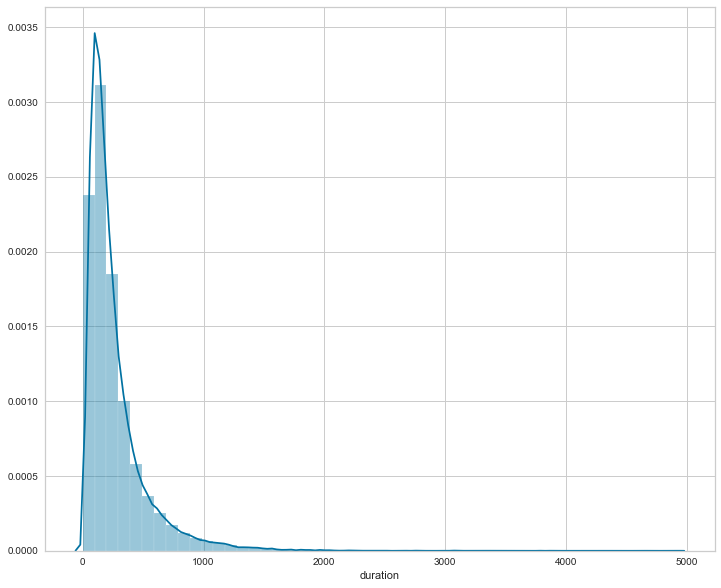

In [18]:
# Distribution of the duration column in dataframe
plt.figure(figsize=(12,10))
sns.distplot(df['duration'])

In [19]:
df['duration'].value_counts(normalize = True)

124    0.00
90     0.00
89     0.00
122    0.00
104    0.00
       ... 
2150   0.00
1970   0.00
1906   0.00
1842   0.00
2015   0.00
Name: duration, Length: 1573, dtype: float64

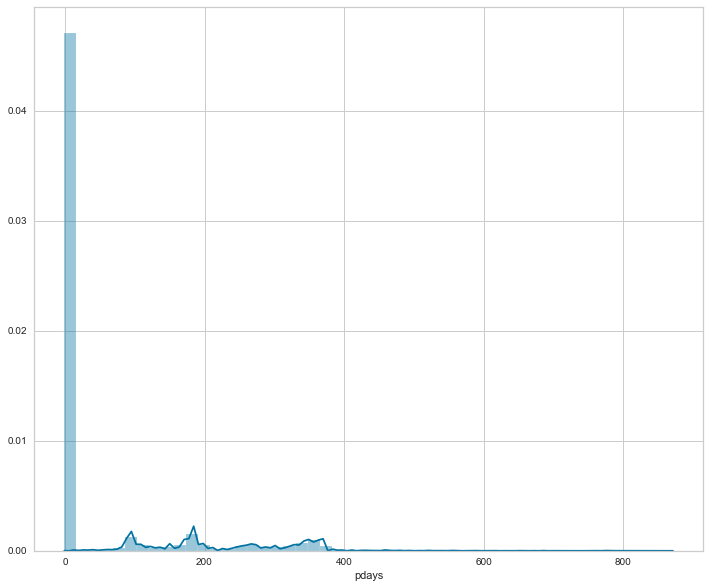

In [20]:
# Distribution of the Pdays column in dataframe
plt.figure(figsize=(12,10))
sns.distplot(df['pdays'])

In [21]:
df['pdays'].value_counts(normalize = True)

-1     0.82
 182   0.00
 92    0.00
 183   0.00
 91    0.00
       ... 
 749   0.00
 717   0.00
 589   0.00
 493   0.00
 32    0.00
Name: pdays, Length: 559, dtype: float64

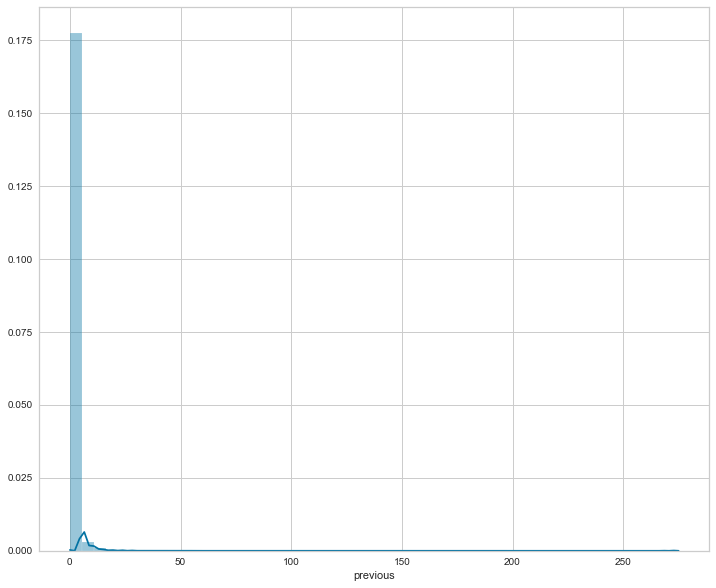

In [22]:
# Distribution of the Previous column in dataframe
plt.figure(figsize=(12,10))
sns.distplot(df['previous'])

In [23]:
df['previous'].value_counts(normalize = True)

0     0.82
1     0.06
2     0.05
3     0.03
4     0.02
5     0.01
6     0.01
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
15    0.00
14    0.00
17    0.00
16    0.00
19    0.00
23    0.00
20    0.00
22    0.00
18    0.00
24    0.00
27    0.00
29    0.00
25    0.00
21    0.00
30    0.00
28    0.00
26    0.00
37    0.00
38    0.00
55    0.00
40    0.00
35    0.00
58    0.00
51    0.00
41    0.00
32    0.00
275   0.00
Name: previous, dtype: float64

<b> Observations on Numerical Attribute Distribution:
    1. Previous and Pdays column is highly skewed. This shows that about 81% 
       of the clients were not contacted before this current campaign. 
    
    2. Day column is trimodal. This shows certain days in the month when the 
       bank usually makes the most efforts to reachout to the clients.
       
    3. Age, Campaign and Duration columns are normally distributed with some 
       level of skewness.
       
    4. Balance column is also highly skewed.
    

### Non-Numerical Attribute Distribution

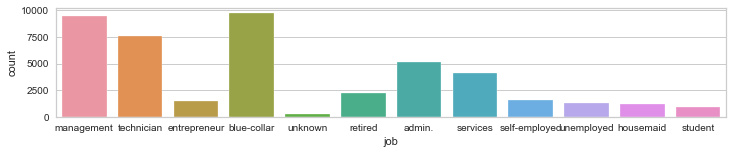

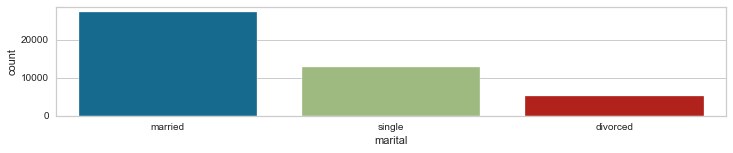

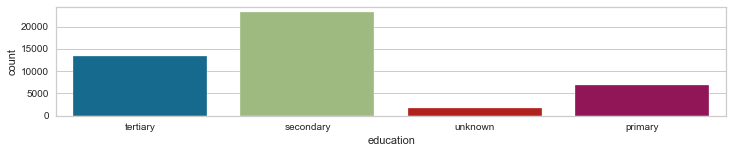

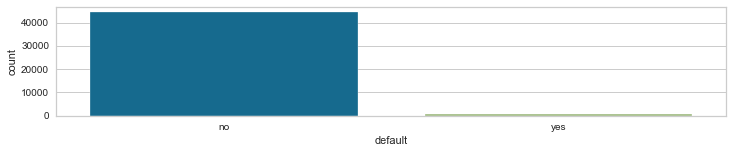

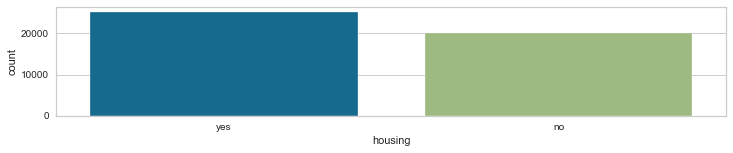

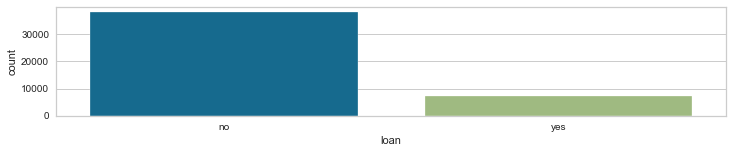

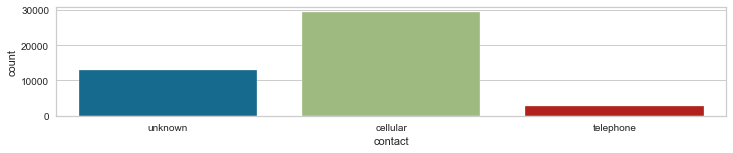

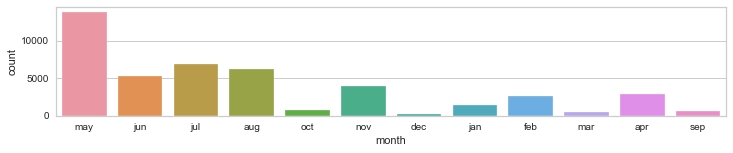

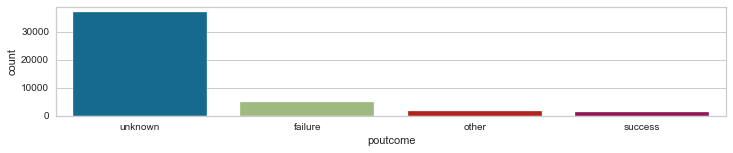

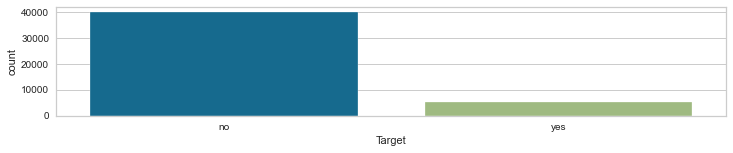

In [24]:
# Univariate Analysis of Non-Numerical variables using a Count Plot
for i in list(df.columns[df.dtypes=='object']):   
    plt.figure(figsize=(12,2))
    sns.countplot(df[i])
    plt.show()

<b> Observations on Non-Numerical Variable Distribution:
    1. For Jobs, there are 288 people with unknown job types. 
    
    2. For Education, there are 1857 people with unknown education level
    
    3. For Contact, we have no idea of how 13,020 clients were contacted previously.
    
    4. For Poutcome, we are not aware of the outcome of the previous marketing campaign 36,959 clients.
       
    5. The default column is highly imbalanced - just 2% of the clients having credit in default.
    
    6. The Target column is highly imbalanced (No: 87%  and Yes: 13%)    

### Missing Values in Dataframe

In [25]:
# Check the Movie info data for missing values:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<b> Observations on Missing Values:
    
    1.There are no missing values (as null or NA) but there are some garbage inputs termed unknown as noticed in 
      distribution of Non-numerical attributes.

    2.Relationships would be set up to replace most of these unkwown values subsequently.

### Outliers in Dataframe

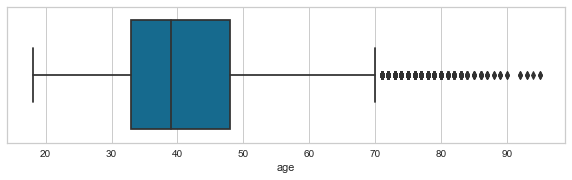

age: 487 data points are outliers
1% of age data are no where near the quartiles


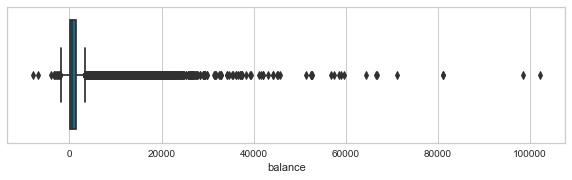

balance: 4729 data points are outliers
10% of balance data are no where near the quartiles


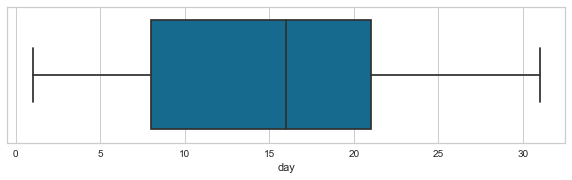

day: 0 data points are outliers
0% of day data are no where near the quartiles


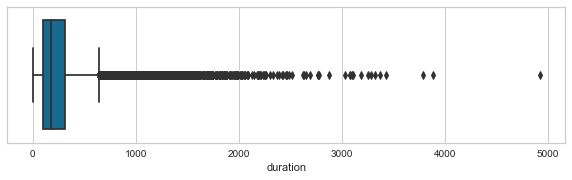

duration: 3235 data points are outliers
7% of duration data are no where near the quartiles


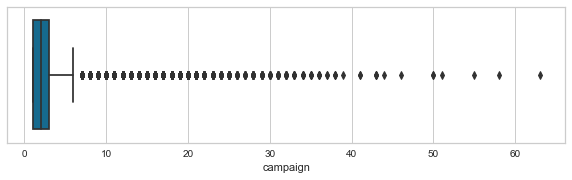

campaign: 3064 data points are outliers
7% of campaign data are no where near the quartiles


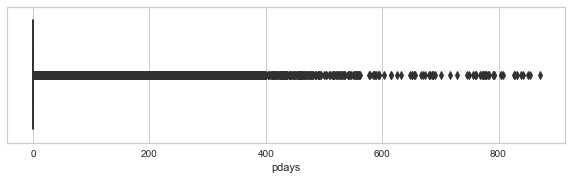

pdays: 8257 data points are outliers
18% of pdays data are no where near the quartiles


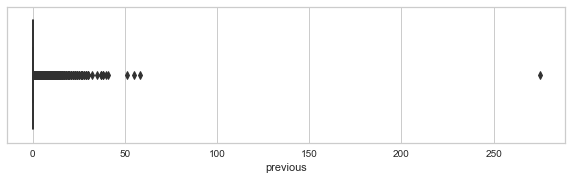

previous: 8257 data points are outliers
18% of previous data are no where near the quartiles


In [26]:
# Outlier Analysis of Numerical variables using Box Plot
for i in list(df.columns[df.dtypes=='int64']):   
    plt.figure(figsize=(10,2.5))
    sns.boxplot(x=df[i])
    plt.show()
    print(str(i) +': ' + str (df[(df[i]<(df[i].quantile(0.25)-(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25))))) | (df[i]>(df[i].quantile(0.75)+(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25)))))].shape[0]) +' data points are outliers')
    print(str(round((df[(df[i]<(df[i].quantile(0.25)-(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25))))) | (df[i]>(df[i].quantile(0.75)+(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25)))))].shape[0]/df.shape[0])*100))+'% of '+str(i)+ ' data are no where near the quartiles')

<b> Observations on Outliers:
    
    1. The day column does not have any outlier. 
    
    2. The Age, Balance, Duration and Campaign columns have less than 10% of their data points as outliers.

    3. The Pdays and Previous columns have 18% of their data points as outliers. 

### Strategies to address Data Pollution
   

<b> For Outliers:
    
    1. We would make a copy of the dataframe.
    
    2. For Age, Balance, Duration and Campaign columns, we would replace the 
    outliers with the lower and upper whisker values of the box plot where 
    applicable.
    
    3. For the Pdays and Previous columns, we would leave the data the way
    it is because we would not be modeling with these attributes due to 
    their being Highly Skewed.
    

In [27]:
# Create a copy of the dataframe
df1 = df.copy()


In [28]:
#Confirm datafram was correctly copied 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


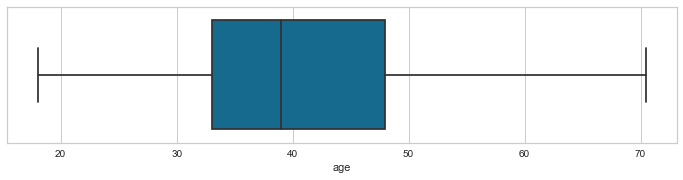

age: 0 data points are outliers
0% of age data are no where near the quartiles


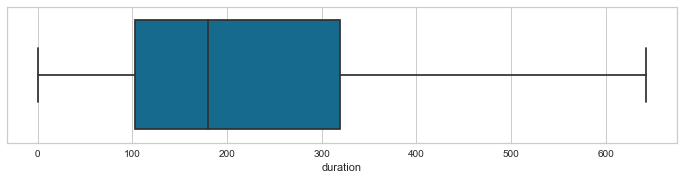

duration: 0 data points are outliers
0% of duration data are no where near the quartiles


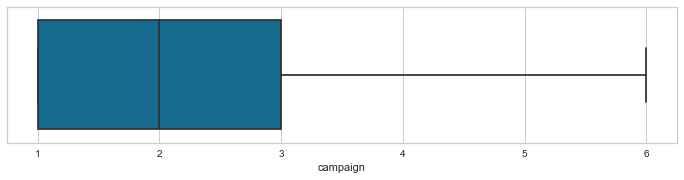

campaign: 0 data points are outliers
0% of campaign data are no where near the quartiles


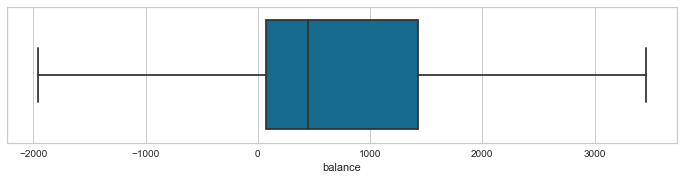

balance: 0 data points are outliers
0% of balance data are no where near the quartiles


In [29]:
# Replace Outlier with upper whisker
for i in list(['age','duration','campaign','balance']):
    upper_whisker = (df1[i].quantile(0.75))+(1.5* (df1[i].quantile(0.75)-df1[i].quantile(0.25)))
    lower_whisker = (df1[i].quantile(0.25))-(1.5* (df1[i].quantile(0.75)-df1[i].quantile(0.25)))
    df1.loc[df1[i]>upper_whisker,i]=upper_whisker
    df1.loc[df1[i]<lower_whisker,i]=lower_whisker
    plt.figure(figsize=(12,2.5))
    sns.boxplot(x=df1[i])
    plt.show()
    print(str(i) +': ' + str (df1[(df1[i]<(df1[i].quantile(0.25)-(1.5* (df1[i].quantile(0.75)-df1[i].quantile(0.25))))) | (df1[i]>(df1[i].quantile(0.75)+(1.5* (df1[i].quantile(0.75)-df1[i].quantile(0.25)))))].shape[0]) +' data points are outliers')
    print(str(round((df1[(df1[i]<(df1[i].quantile(0.25)-(1.5* (df1[i].quantile(0.75)-df1[i].quantile(0.25))))) | (df1[i]>(df1[i].quantile(0.75)+(1.5* (df1[i].quantile(0.75)-df1[i].quantile(0.25)))))].shape[0]/df1.shape[0])*100))+'% of '+str(i)+ ' data are no where near the quartiles')

In [30]:
# View Descriptive Statistics of New Dataframe
df1.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.87,10.39,18.00,33.00,39.00,48.00,70.50
balance,"45,211.00",933.71,"1,176.77","-1,962.00",72.00,448.00,"1,428.00","3,462.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",234.94,176.75,0.00,103.00,180.00,319.00,643.00
campaign,"45,211.00",2.39,1.60,1.00,1.00,2.00,3.00,6.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [31]:
# Compare descriptive statistics of new dataframe with initial dataframe to observe the changes
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [32]:
#Skewness of the initial dataframe
df.skew()

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

In [33]:
# Skewness of New dataframe after replacing outliers 
df1.skew()

age         0.53
balance     1.10
day         0.09
duration    1.04
campaign    1.10
pdays       2.62
previous   41.85
dtype: float64

<b> Observation: 
    
    All outliers in Age, Balance, Duration and Campaign columns have been replaced thereby reducing the skewness of these 
    attributes.

<b> For Missing Values:
    
    1. For the Job Column, we would replace 'unknown' values with the mode.
    
    2. For the Education Column, we would leave it as unknown and create an category with an order of -1, after we have 
       converted the string variables to categorical variables.
       
    3. For the Contact and Poutcome columns, we would leave them the way they are as we would not be using these attributes
       in modelling.

In [34]:
# Check the count of the Job data
df1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [35]:
df1.replace({"job":{"unknown":"blue-collar"}},inplace = True)

In [36]:
df1['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

 Unknown category has been added to the Blue-collar job category

## Multivariate Analysis (8 marks)

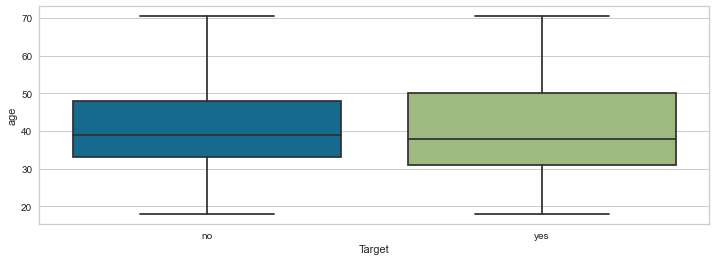

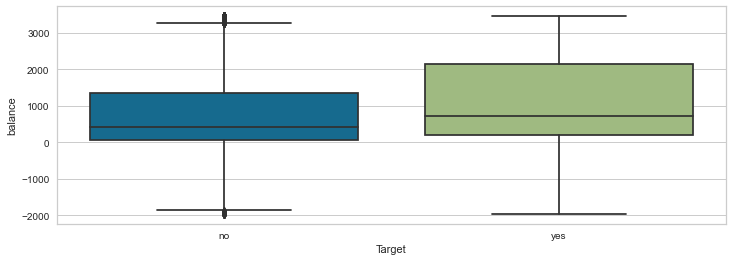

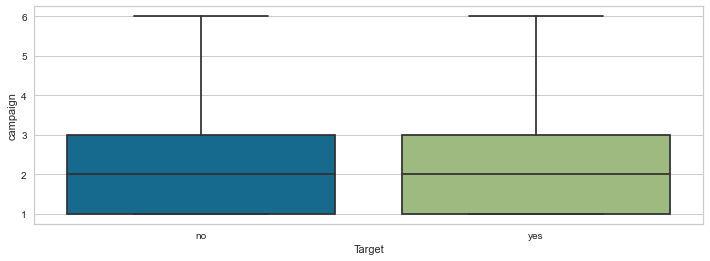

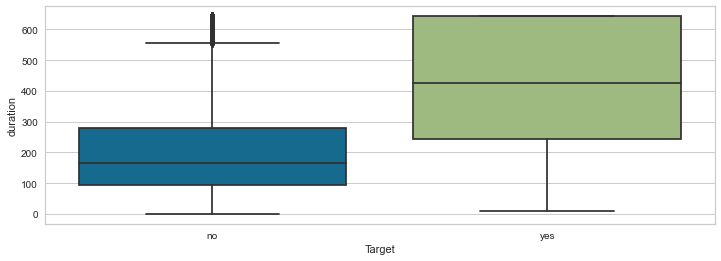

In [37]:
for i in list(['age','balance','campaign','duration']):   
    plt.figure(figsize=(12,4))
    sns.boxplot(y=df1[i], x= df1['Target'])
    plt.show()

<b> Observations: 
    1. There does not seem to be a clear distinction between those that suscribed for term deposit and those that didn't in the most of the attributes. 
    2. For Duration, it is observed that for the clients that were contacted previously, the longer the duration of contact, the more likely the client subscribed as seen in the boxplot above.

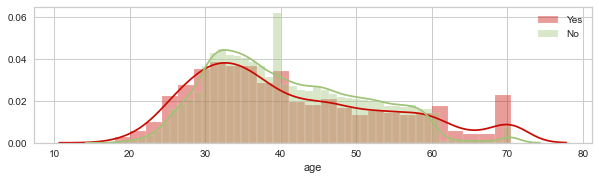

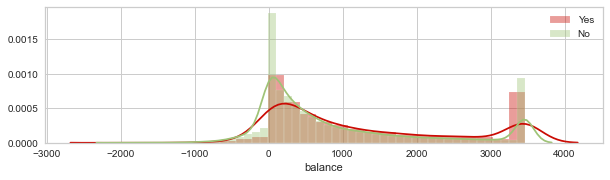

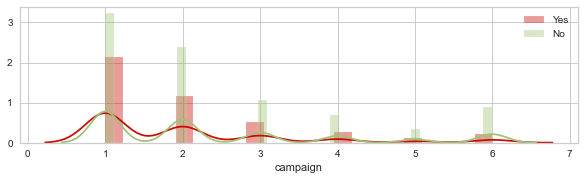

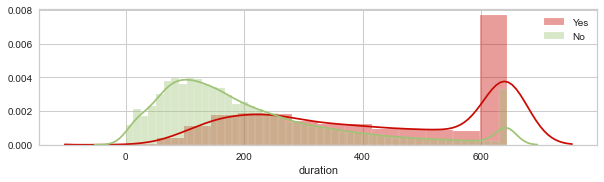

In [38]:
# Outlier Analysis of Numerical variables using Box Plot
for i in list(['age','balance','campaign','duration']):   
    plt.figure(figsize=(10,2.5))
    sns.distplot(df1[df['Target']=='yes'][i],color ='r', label = 'Yes')
    sns.distplot(df1[df['Target']=='no'][i],color ='g', label = 'No')
    plt.legend()
    plt.show()
    

<b> Observation:

From the Campaign Distribution Plot, we notice that as the number of contacts made for a particular client increased, the proportion of clients that subcribed to the term deposit decreased. Thus an increase in the number contacts made with a client does not necessarily guarantee the client will suscribe to the term deposit. 

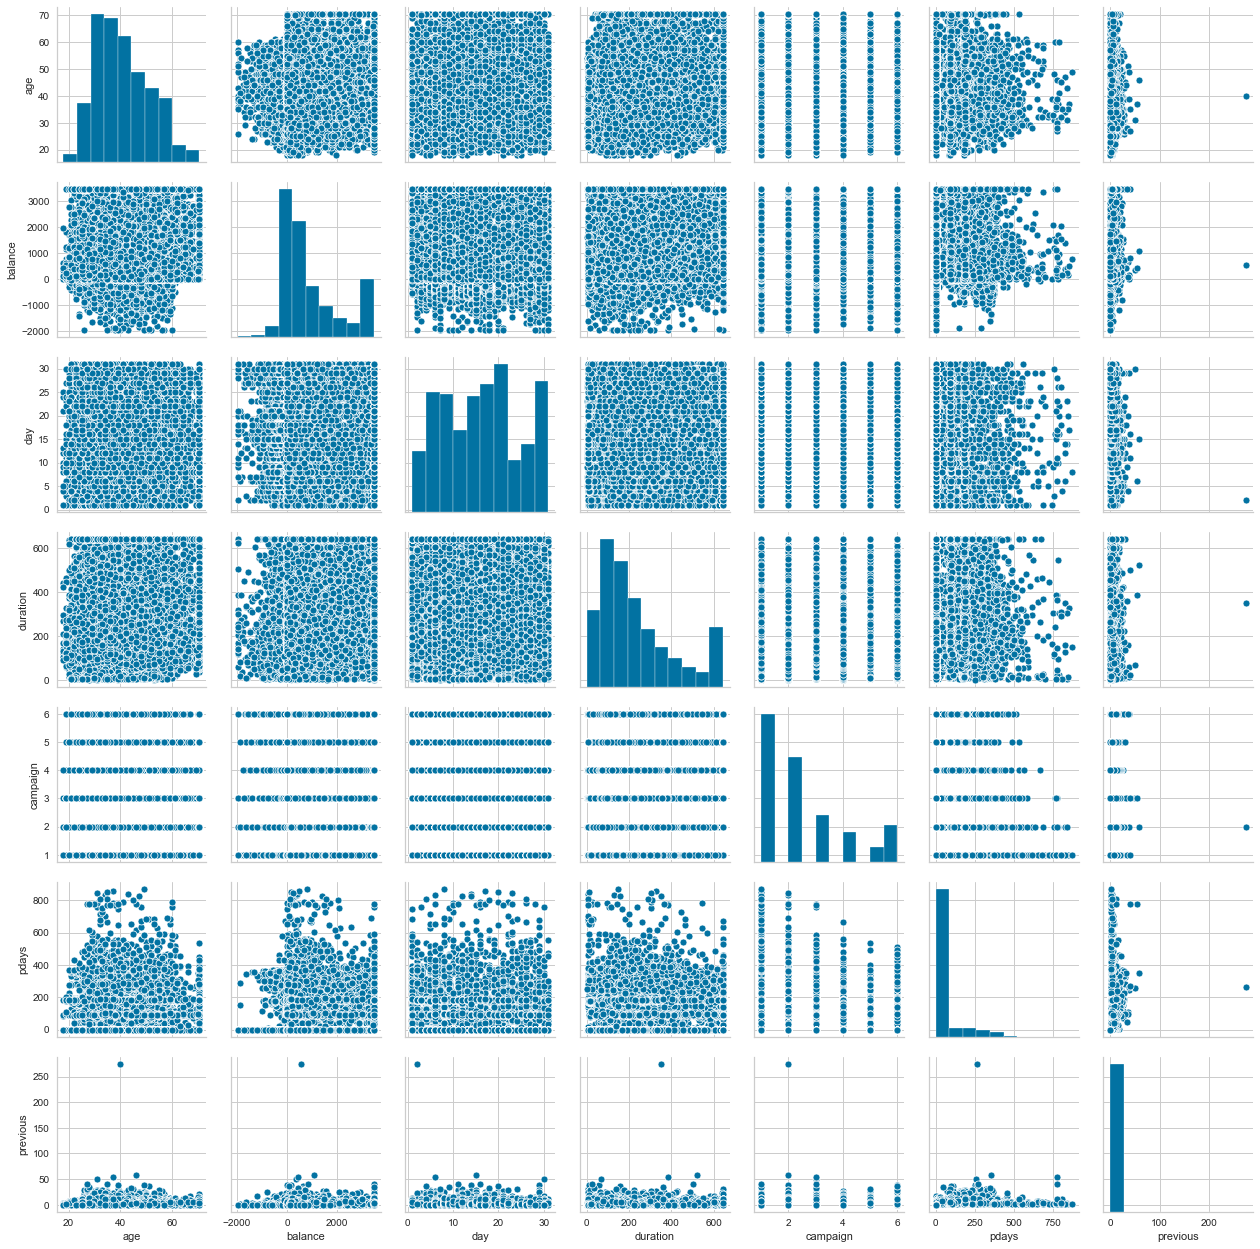

In [39]:
sns.pairplot(df1)

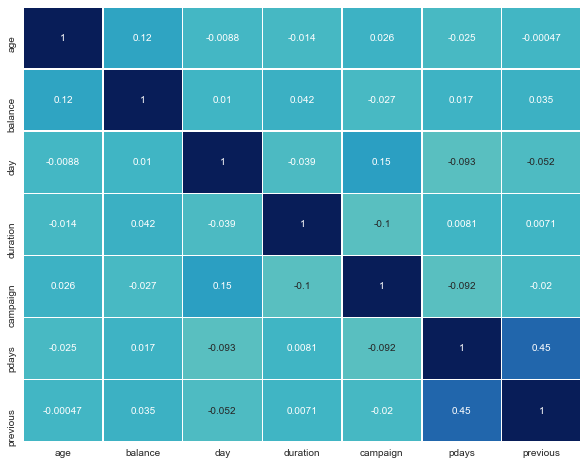

In [40]:
plt.figure(figsize=(10,8))

sns.heatmap(df1.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

<b> No visible relationship/correlation among the attributes. 

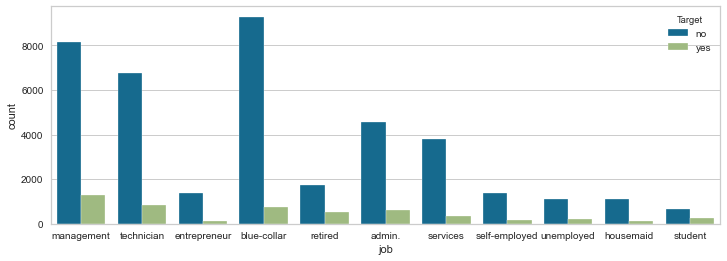

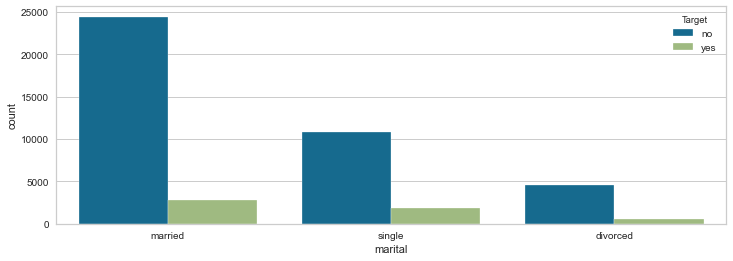

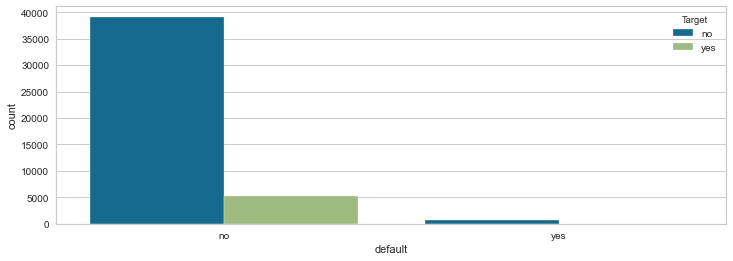

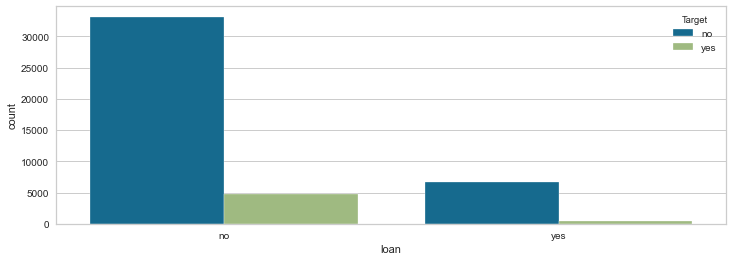

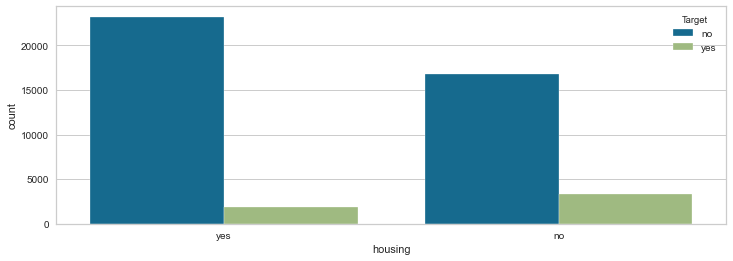

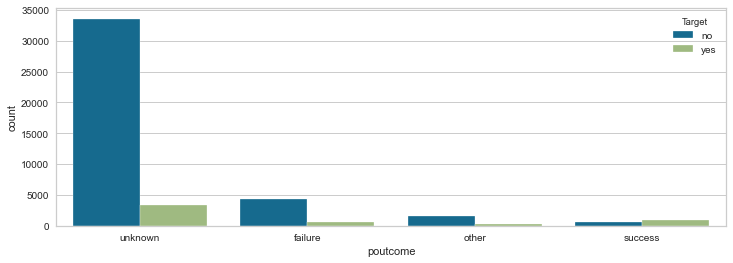

In [41]:
for i in list(['job','marital','default','loan','housing','poutcome']):   
    plt.figure(figsize=(12,4))
    sns.countplot(df1[i],hue = df1['Target'])
    plt.show()

<b> Observations:
    
    1. None of the Clients that had credit in default subscribed for the term deposits. 
    2. We have more term deposit subscribers in the management job type than any other job.
    3. We have fewer term deposit subscribers that have personal loans when compared to thos who do not have personal loans.

## Deliverable – 2 (Prepare the data for analytics) – (10)

### Correct Attribute Data types

In [42]:
for feature in df1.columns: # Loop through all columns in the dataframe
    if df1[feature].dtype == 'object': # Only apply for columns with categorical strings
        df1[feature] = pd.Categorical(df1[feature])# Replace strings with an integer
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  float64 
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  float64 
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  float64 
 12  campaign   45211 non-null  float64 
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), float64(4), int64(3)
memory usage: 2.8 MB


All Atrribute with 'object' datatype have now been converted into categorical variables

### Get Data Model Ready

In [43]:
# Drop Highly Skewed Attributes and other attributes that would not be used for modelling
df1.drop(columns=['day','month','contact','pdays','previous'], inplace = True)
df1.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome,Target
0,58.00,management,married,tertiary,no,"2,143.00",yes,no,261.00,1.00,unknown,no
1,44.00,technician,single,secondary,no,29.00,yes,no,151.00,1.00,unknown,no
2,33.00,entrepreneur,married,secondary,no,2.00,yes,yes,76.00,1.00,unknown,no
3,47.00,blue-collar,married,unknown,no,"1,506.00",yes,no,92.00,1.00,unknown,no
4,33.00,blue-collar,single,unknown,no,1.00,no,no,198.00,1.00,unknown,no


In [44]:
# Get Strings in categorical variables to be replaced with integers to signify order
replaceStruct = {
                "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                 "poutcome":     {"failure": 1, "other": 2, "success": 3, "unknown": -1 },
                  "default":     {"no": 0, "yes": 1 }, 
                  "housing":     {"no": 0, "yes": 1 },
                     "loan":     {"no": 0, "yes": 1 },
                   "Target":     {"no": 0, "yes": 1 },
                    }
# Get categorical data that do not have order to be used for One Hot Encoding 
oneHotCols=["job","marital"]

In [45]:
df1=df1.replace(replaceStruct) # replace strings with integers
df1=pd.get_dummies(df1, columns=oneHotCols) # get dummies using One Hot Encoding
df1.head(10)


,age,education,default,balance,housing,loan,duration,campaign,poutcome,Target,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58.00,3,0,"2,143.00",1,0,261.00,1.00,-1,0,...,1,0,0,0,0,0,0,0,1,0
1,44.00,2,0,29.00,1,0,151.00,1.00,-1,0,...,0,0,0,0,0,1,0,0,0,1
2,33.00,2,0,2.00,1,1,76.00,1.00,-1,0,...,0,0,0,0,0,0,0,0,1,0
3,47.00,-1,0,"1,506.00",1,0,92.00,1.00,-1,0,...,0,0,0,0,0,0,0,0,1,0
4,33.00,-1,0,1.00,0,0,198.00,1.00,-1,0,...,0,0,0,0,0,0,0,0,0,1
5,35.00,3,0,231.00,1,0,139.00,1.00,-1,0,...,1,0,0,0,0,0,0,0,1,0
6,28.00,3,0,447.00,1,1,217.00,1.00,-1,0,...,1,0,0,0,0,0,0,0,0,1
7,42.00,3,1,2.00,1,0,380.00,1.00,-1,0,...,0,0,0,0,0,0,0,1,0,0
8,58.00,1,0,121.00,1,0,50.00,1.00,-1,0,...,0,1,0,0,0,0,0,0,1,0
9,43.00,2,0,593.00,1,0,55.00,1.00,-1,0,...,0,0,0,0,0,1,0,0,0,1


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   education          45211 non-null  int64  
 2   default            45211 non-null  int64  
 3   balance            45211 non-null  float64
 4   housing            45211 non-null  int64  
 5   loan               45211 non-null  int64  
 6   duration           45211 non-null  float64
 7   campaign           45211 non-null  float64
 8   poutcome           45211 non-null  int64  
 9   Target             45211 non-null  int64  
 10  job_admin.         45211 non-null  uint8  
 11  job_blue-collar    45211 non-null  uint8  
 12  job_entrepreneur   45211 non-null  uint8  
 13  job_housemaid      45211 non-null  uint8  
 14  job_management     45211 non-null  uint8  
 15  job_retired        45211 non-null  uint8  
 16  job_self-employed  452

### Transform Data i.e scale / Normalize due to differences in value ranges 

In [47]:
#Scales the data. Essentially returns the z-scores of every attribute

# from sklearn.preprocessing import StandardScaler

# std_scale = StandardScaler()

# std_scale

#Scales the data. using Min and max.

from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()

minmax_scale


MinMaxScaler(copy=True, feature_range=(0, 1))

In [48]:
df1['duration_MinMaxScale'] = minmax_scale.fit_transform(df1[['duration']]) 

df1['balance_MinMaxScale'] = minmax_scale.fit_transform(df1[['balance']])

# df1['age_MinMaxScale'] = minmax_scale.fit_transform(df1[['age']])

# df1['campaign_MinMaxScale'] = minmax_scale.fit_transform(df1[['campaign']])

The MinMaxScaler is used to Scale Duration and Balance Attributes. 

### Create the training set and test set in ratio of 70:30

In [49]:
#Define X and Y variables 
X = df1.drop(columns=['Target','duration','balance'])
Y = df1[['Target']]

#Splitting data into training and test data set in 70:30 respectively 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

## Deliverable – 3 (create the ensemble model) – (30)

### Building Logistic Regression and Decision Tree Models – (10 marks)


In [50]:
lr = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=0.75)
lr.fit(X_train, y_train)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
pred_LR = lr.predict(X_test)
acc_LR = accuracy_score(y_test, pred_LR)
recall_LR=recall_score(y_test,pred_LR)
precision_LR = precision_score(y_test,pred_LR)
f1_LR = f1_score(y_test,pred_LR)


In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_LR})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89


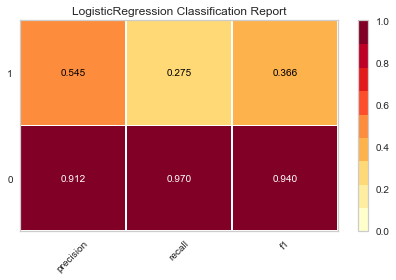

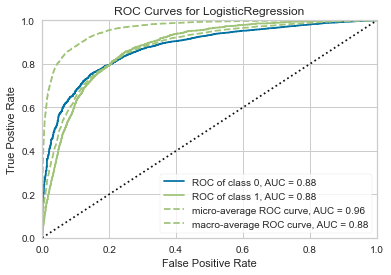

In [53]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=0.75))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=0.75))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [54]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.8917748917748918

Testing accuracy 0.8908876437629017

Confusion Matrix


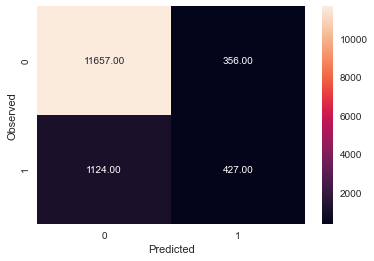

None

Recall: 0.2753062540296583

Precision: 0.545338441890166

F1 Score: 0.3658954584404456

Roc Auc Score: 0.6228358457362143


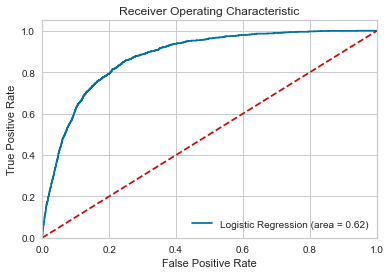

In [55]:
print("Training accuracy",lr.score(X_train,y_train))  
print()
print("Testing accuracy",lr.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,pred_LR))
print()
print("Recall:",recall_score(y_test,pred_LR))
print()
print("Precision:",precision_score(y_test,pred_LR))
print()
print("F1 Score:",f1_score(y_test,pred_LR))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_LR))

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [56]:
dtcl = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                               max_depth=3, min_samples_leaf=5)
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [57]:
pred_DT = dtcl.predict(X_test)
acc_DT = accuracy_score(y_test, pred_DT)
recall_DT=recall_score(y_test,pred_DT)
precision_DT = precision_score(y_test,pred_DT)
f1_DT = f1_score(y_test,pred_DT)

In [58]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_DT]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.90


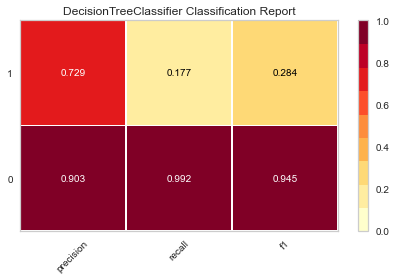

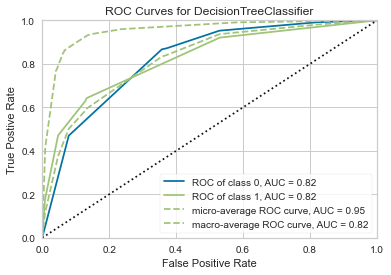

In [59]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                               max_depth=3, min_samples_leaf=5))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                               max_depth=3, min_samples_leaf=5))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Training accuracy 0.8947135589471356

Testing accuracy 0.8983338248304334

Confusion Matrix


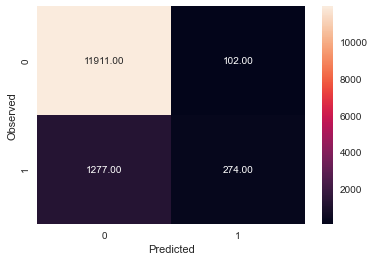

None

Recall: 0.1766602192134107

Precision: 0.7287234042553191

F1 Score: 0.2843798650752465

Roc Auc Score: 0.5840847087909226


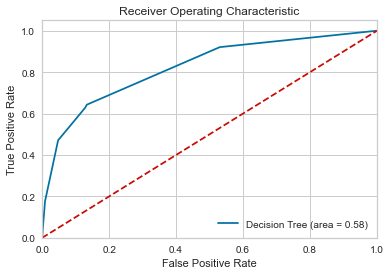

In [60]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    
print("Training accuracy",dtcl.score(X_train,y_train))  
print()
print("Testing accuracy",dtcl.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,pred_DT))
print()
print("Recall:",recall_score(y_test,pred_DT))
print()
print("Precision:",precision_score(y_test,pred_DT))
print()
print("F1 Score:",f1_score(y_test,pred_DT))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_DT))

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, dtcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtcl.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Building Ensemble Models (Bagging, Boosting and Random Forest) – (15 marks)

In [61]:
from sklearn.ensemble import BaggingClassifier

bcl = BaggingClassifier(n_estimators=50,max_samples=0.7,bootstrap=True, oob_score=True, random_state=42)
bcl.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.7, n_estimators=50,
                  n_jobs=None, oob_score=True, random_state=42, verbose=0,
                  warm_start=False)

In [62]:
pred_BC = bcl.predict(X_test)
acc_BC = accuracy_score(y_test, pred_BC)
recall_BC=recall_score(y_test,pred_BC)
precision_BC = precision_score(y_test,pred_BC)
f1_BC = f1_score(y_test,pred_BC)

In [63]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BC]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.90
0,Bagging,0.89


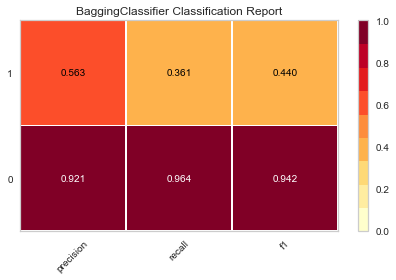

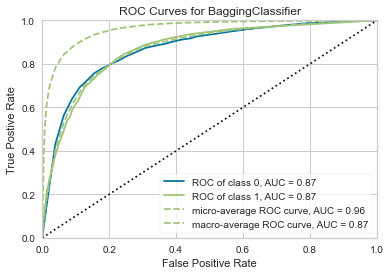

In [64]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= 0.7, bootstrap=True, oob_score=True, random_state=42))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= 0.7, bootstrap=True, oob_score=True, random_state=42))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Training accuracy 0.9889720984611495

Testing accuracy 0.8949424948392805

Confusion Matrix


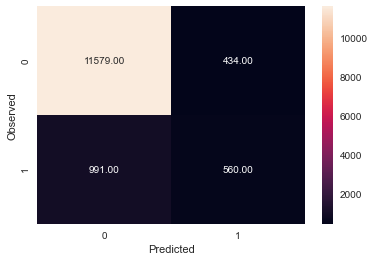

None

Recall: 0.3610573823339781

Precision: 0.5633802816901409

F1 Score: 0.4400785854616896

Roc Auc Score: 0.6624649269115991


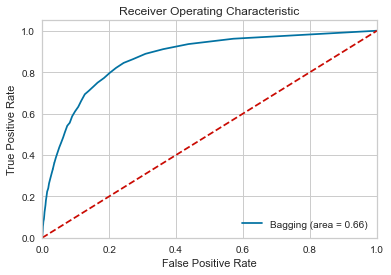

In [65]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    
print("Training accuracy",bcl.score(X_train,y_train))  
print()
print("Testing accuracy",bcl.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,pred_BC))
print()
print("Recall:",recall_score(y_test,pred_BC))
print()
print("Precision:",precision_score(y_test,pred_BC))
print()
print("F1 Score:",f1_score(y_test,pred_BC))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_BC))

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, bcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bcl.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=42)
acc_GBC = gbcl.fit(X_train, y_train)

In [67]:
pred_GBC = gbcl.predict(X_test)
acc_GBC = accuracy_score(y_test, pred_GBC)
recall_GBC=recall_score(y_test,pred_GBC)
precision_GBC = precision_score(y_test,pred_GBC)
f1_GBC = f1_score(y_test,pred_GBC)

In [68]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GBC]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.90
0,Bagging,0.89
0,Gradient Boost,0.90


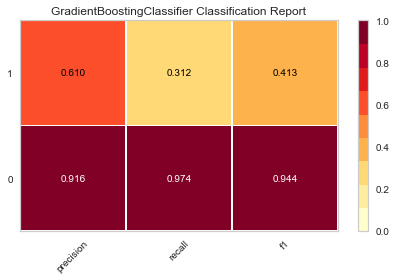

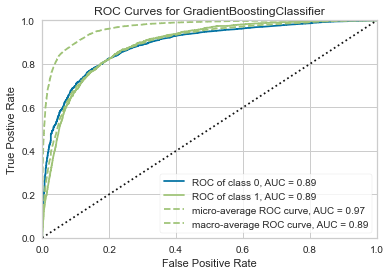

In [69]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=42))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=42))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Training accuracy 0.9002433090024331

Testing accuracy 0.8984812739604836

Confusion Matrix


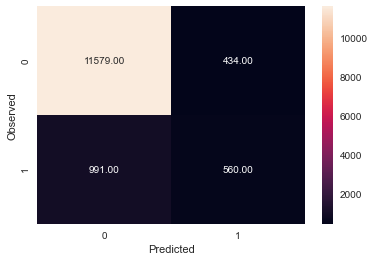

None

Recall: 0.3120567375886525

Precision: 0.6095717884130982

F1 Score: 0.4127931769722814

Roc Auc Score: 0.6431256800404762


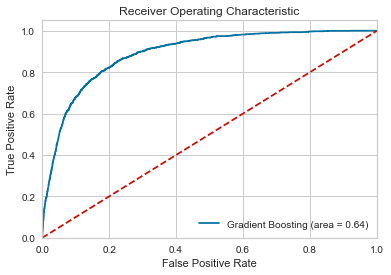

In [70]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    
print("Training accuracy",gbcl.score(X_train,y_train))  
print()
print("Testing accuracy",gbcl.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,pred_BC))
print()
print("Recall:",recall_score(y_test,pred_GBC))
print()
print("Precision:",precision_score(y_test,pred_GBC))
print()
print("F1 Score:",f1_score(y_test,pred_GBC))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_GBC))

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, gbcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbcl.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [72]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF=recall_score(y_test,pred_RF)
precision_RF = precision_score(y_test,pred_RF)
f1_RF = f1_score(y_test,pred_RF)

In [73]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.90
0,Bagging,0.89
0,Gradient Boost,0.90
0,Random Forest,0.89


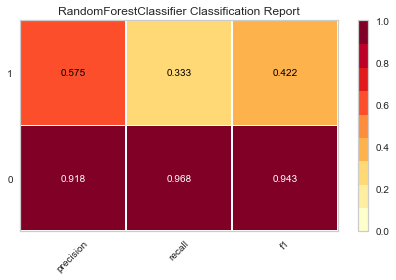

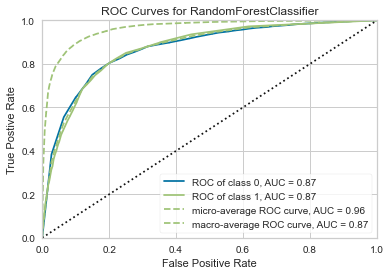

In [74]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Training accuracy 0.9995260214238316

Testing accuracy 0.8949424948392805

Confusion Matrix


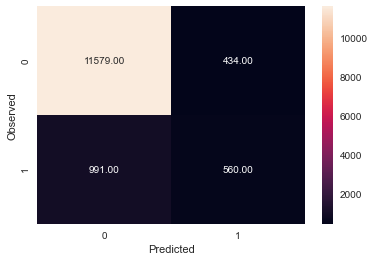

None

Recall: 0.3262411347517731

Precision: 0.5711060948081265

F1 Score: 0.415264669675831

Roc Auc Score: 0.647304368258264


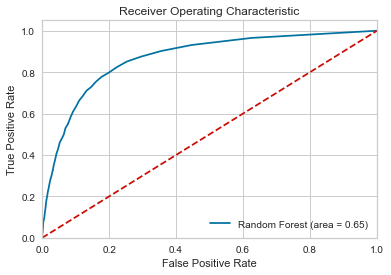

In [75]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    
print("Training accuracy",rfcl.score(X_train,y_train))  
print()
print("Testing accuracy",rfcl.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,pred_BC))
print()
print("Recall:",recall_score(y_test,pred_RF))
print()
print("Precision:",precision_score(y_test,pred_RF))
print()
print("F1 Score:",f1_score(y_test,pred_RF))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_RF))

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, rfcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfcl.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [76]:
#Store the accuracy results for each model in a dataframe for final comparison
Summary_Df = pd.DataFrame({'Method':['Logistic Regression','Decision Tree','Bagging','Gradient Boost','Random Forest'], 'accuracy': [acc_LR, acc_DT, acc_BC,acc_GBC,acc_RF],'Precision':[precision_LR,precision_DT,precision_BC,precision_GBC,precision_RF],'Recall':[recall_LR,recall_DT,recall_BC,recall_GBC,recall_RF],'F1 Score':[f1_LR,f1_DT,f1_BC,f1_GBC,f1_RF] })
Summary_Df = Summary_Df[['Method', 'accuracy','Precision','Recall','F1 Score']]
Summary_Df

,Method,accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.89,0.55,0.28,0.37
1,Decision Tree,0.90,0.73,0.18,0.28
2,Bagging,0.89,0.56,0.36,0.44
3,Gradient Boost,0.90,0.61,0.31,0.41
4,Random Forest,0.89,0.57,0.33,0.42


## Conclusion

The best algorithm for this case study is the Bagging Algorithm as it has the highest F1 Score and Recall Scores. 

In this case study, we would need to reduce the False Negatives because if FN are high it means that we are targeting the wrong clients as we would be losing customers who would subscribed for the term deposits. 

The model will still require more testing and featuring engineering to increase the Recall Score before it is deployed for practical use to enable the bank's marketing team predict clients that are more likely to suscribe term deposits and thus increase their hit ratio. 
